In [2]:
import re 
import pdfplumber

import csv

DATE_STRING = '2020-05-19'

outfile = 'covid_conjugate_0519.csv'
outfileh = open(outfile, 'w')
writer = csv.writer(outfileh)

writer.writerow(['facility','county', 'first_reported', 'start_date', 'cases', 'deaths', 'report_date'])

file = "../or_weekly_reports/COVID-19-Weekly-Report-%s-FINAL.pdf" % DATE_STRING
pdf = pdfplumber.open(file)


In [3]:
settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "words",
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


In [6]:


pagenumber = 5

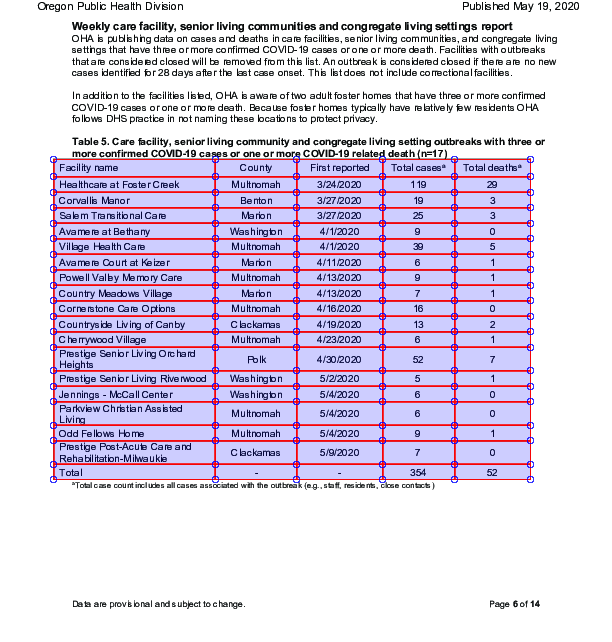

In [7]:
#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
height = pdf.pages[pagenumber].height
box1 = (0, 150,  width, height)

cropped_page = pdf.pages[pagenumber].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [8]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_row = table_found[i]

    if not this_row[0]:
        # hack for misread 
        print("Empty-ish row, continuing")
        continue
    if this_row[0]=='Total':
        continue
    print(len(this_row))
    assert len(this_row)==5
    print(this_row)
    this_row.append(DATE_STRING)
    writer.writerow(this_row)
    

5
['Healthcare at Foster Creek', 'Multnomah', '3/24/2020', '119', '29']
5
['Corvallis Manor', 'Benton', '3/27/2020', '19', '3']
5
['Salem Transitional Care', 'Marion', '3/27/2020', '25', '3']
5
['Avamere at Bethany', 'Washington', '4/1/2020', '9', '0']
5
['Village Health Care', 'Multnomah', '4/1/2020', '39', '5']
5
['Avamere Court at Keizer', 'Marion', '4/11/2020', '6', '1']
5
['Powell Valley Memory Care', 'Multnomah', '4/13/2020', '9', '1']
5
['Country Meadows Village', 'Marion', '4/13/2020', '7', '1']
5
['Cornerstone Care Options', 'Multnomah', '4/16/2020', '16', '0']
5
['Countryside Living of Canby', 'Clackamas', '4/19/2020', '13', '2']
5
['Cherrywood Village', 'Multnomah', '4/23/2020', '6', '1']
5
['Prestige Senior Living Orchard \nHeights', 'Polk', '4/30/2020', '52', '7']
5
['Prestige Senior Living Riverwood', 'Washington', '5/2/2020', '5', '1']
5
['Jennings - McCall Center', 'Washington', '5/4/2020', '6', '0']
5
['Parkview Christian Assisted \nLiving', 'Multnomah', '5/4/2020', '6

In [9]:
## that's the end! In other reports there might be more. 

In [10]:
outfileh.close()
